# Multiobjective optimization with Pareto front mapping

One way to do multiobjective optimization is with Pareto optimization, which explores the set of Pareto-efficient points. A point is Pareto-efficient if there are no other valid points that are better at every objective: it shows the "trade-off" between several objectives. 

In [1]:
from blop.utils import prepare_re_env

%run -i $prepare_re_env.__file__ --db-type=temp

In [2]:
from blop import DOF, Objective, Agent
from blop.utils import functions
from blop.dofs import BrownianMotion

import numpy as np


def digestion(df):
    for index, entry in df.iterrows():
        x1, x2 = entry.x1, entry.x2

        df.loc[index, "f1"] = (x1 - 2) ** 2 + (x2 - 1) + 2
        df.loc[index, "f2"] = 9 * x1 - (x2 - 1) + 2
        df.loc[index, "c1"] = x1**2 + x2**2
        df.loc[index, "c2"] = x1 - 3 * x2 + 10

    return df


dofs = [
    DOF(name="x1", search_domain=(-20, 20)),
    DOF(name="x2", search_domain=(-20, 20)),
]


objectives = [
    Objective(name="f1", target="min"),
    Objective(name="f2", target="min"),
    Objective(name="c1", target=(-np.inf, 225)),
    Objective(name="c2", target=(-np.inf, 0)),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=digestion,
    db=db,
)

(uid,) = RE(agent.learn("qr", n=64))



Transient Scan ID: 1     Time: 2024-09-26 23:34:10
Persistent Unique Scan ID: '6de1285f-dec1-4c03-8f29-d73e112d8f39'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 23:34:10.2 |     -1.038 |     -0.475 |
|         2 | 23:34:10.2 |     -0.608 |      0.570 |
|         3 | 23:34:10.2 |      4.819 |      1.053 |
|         4 | 23:34:10.2 |      4.311 |     -0.950 |
|         5 | 23:34:10.2 |      7.591 |     -4.854 |
|         6 | 23:34:10.2 |      5.077 |     -6.787 |
|         7 | 23:34:10.2 |      1.795 |     -7.879 |
|         8 | 23:34:10.2 |      9.613 |    -10.723 |
|         9 | 23:34:10.2 |     14.223 |     -8.912 |
|        10 | 23:34:10.2 |     17.503 |     -5.007 |
|        11 | 23:34:10.2 |     15.146 |     -3.197 |
|        12 | 23:34:10.2 |     11.864 |     -2.104 |
|        13 | 23:34:10.2 |     12.293 |      2.164 |
|        14

+-----------+------------+------------+------------+
generator list_scan ['6de1285f'] (scan num: 1)





We can plot our fitness and constraint objectives to see their models:

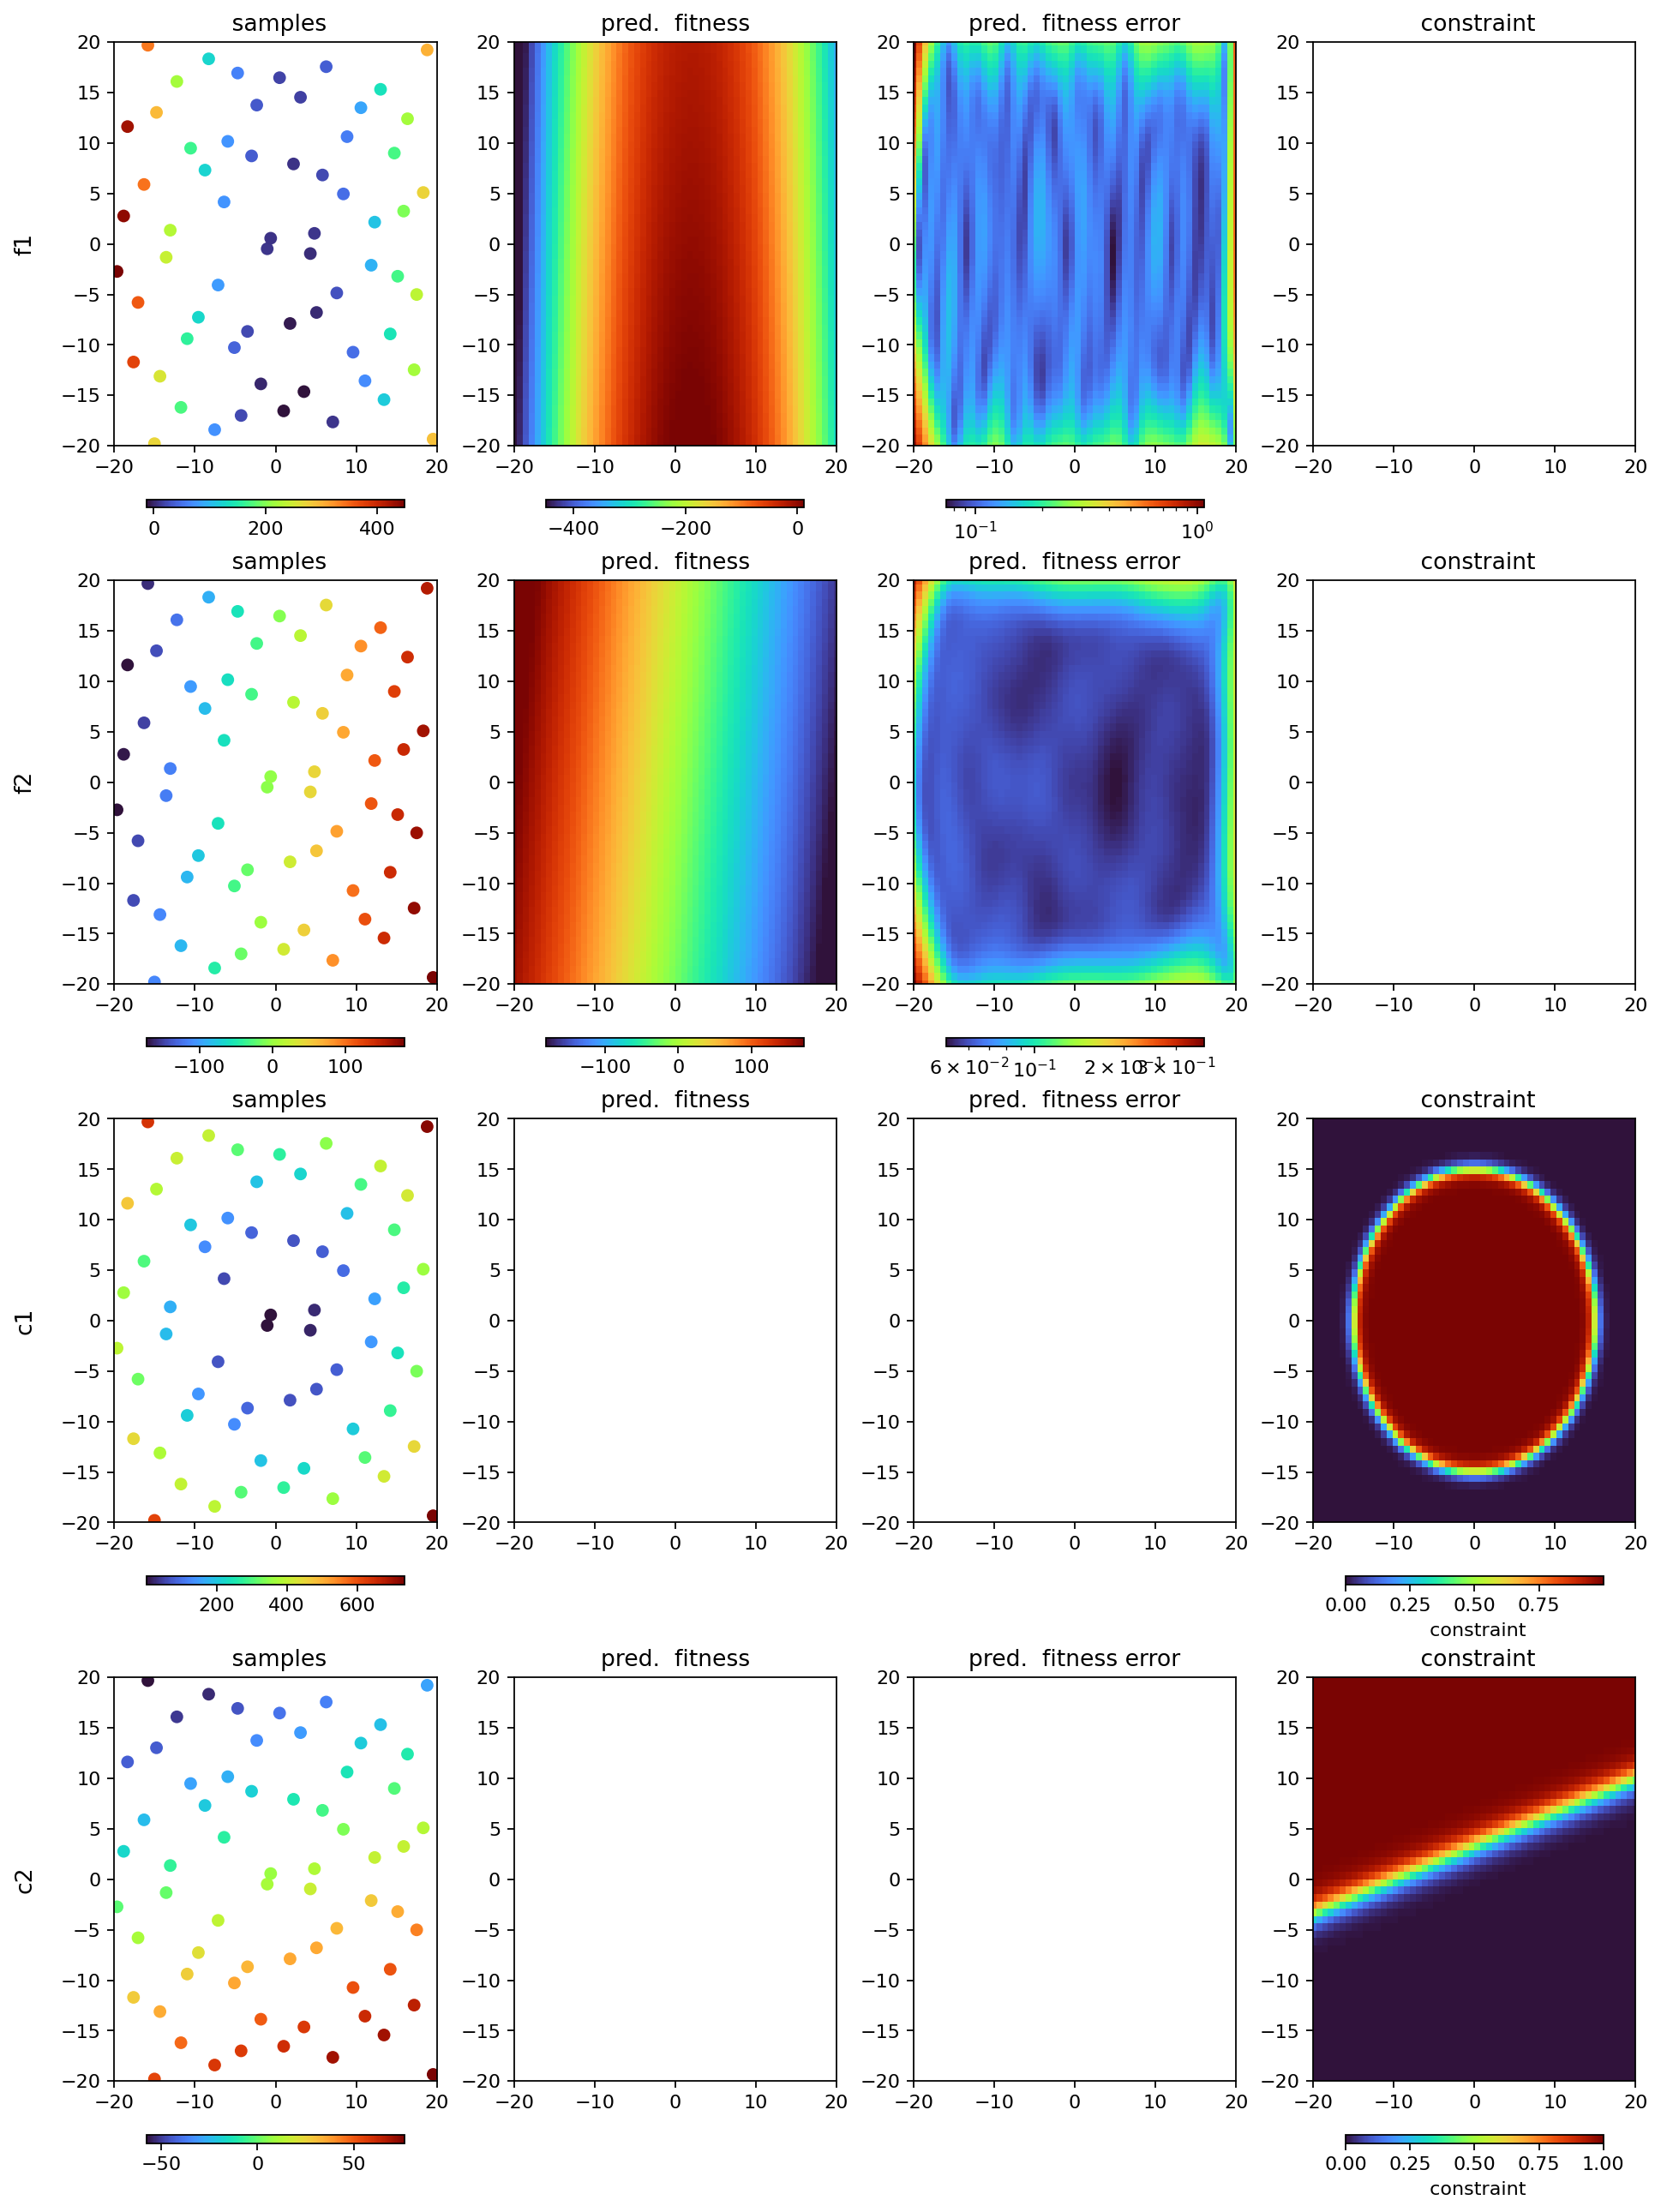

In [3]:
agent.plot_objectives()

We can plot the Pareto front (the set of all Pareto-efficient points), which shows the trade-off between the two fitnesses. The points in blue comprise the Pareto front, while the points in red are either not Pareto efficient or are invalidated by one of the constraints.

/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/blop/plotting.py:556: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3697.)
  ax.scatter(*y[~constraint].T[[i, j]], c="r", marker="x", label="invalid")


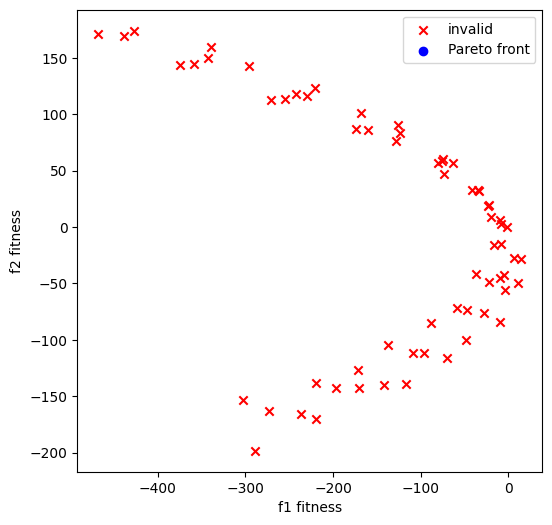

In [4]:
agent.plot_pareto_front()

We can explore the Pareto front by choosing a random point on the Pareto front and computing the expected improvement in the hypervolume of all fitness objectives with respect to that point (called the "reference point"). All this is done automatically with the `qnehvi` acquisition function:

In [5]:
# this is broken now but is fixed in the next PR
# RE(agent.learn("qnehvi", n=4))